In [1]:
#load the dataset
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="l5rqqMuXba79afgQZRKo")
project = rf.workspace("brad-dwyer").project("thermal-cheetah")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 85.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Thermal-Cheetah-1 in yolov8:: 100%|██████████| 270/270 [00:00<00:00, 8022.14it/s]


In [2]:
#install ultralytics
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.0 MB/s eta 0:00:00


In [3]:
#model Building
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
results = results = model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    name="roboflow_yolov8_train",
    device=0
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.231 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Thermal-Cheetah-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, ke

In [4]:
#model validation
metrics = model.val()
print("Validation complete!")
print(metrics)

Ultralytics 8.3.231 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 643.7±256.9 MB/s, size: 26.9 KB)
val: Scanning /content/Thermal-Cheetah-1/valid/labels.cache... 25 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 25/25 16.7Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.2it/s 1.7s
                   all         25         48      0.912      0.795      0.933      0.613
               cheetah         25         39      0.946      0.795      0.932      0.727
                 human          3          9      0.877      0.795      0.935        0.5
Speed: 9.9ms preprocess, 19.1ms inference, 0.0ms loss, 6.8ms postprocess per image
Results saved to /content/runs/detect/val
Validation complete!
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index:

In [5]:
#model prediction
model.predict(source=f"{dataset.location}/test/images", save=True)


image 1/14 /content/Thermal-Cheetah-1/test/images/IMG_0028_jpeg.rf.514f114438ecc7b4598469edfa2ab9d5.jpg: 640x640 3 cheetahs, 8.4ms
image 2/14 /content/Thermal-Cheetah-1/test/images/IMG_0040_jpeg.rf.6b861f9901f1e6ca029059ea643656cf.jpg: 640x640 1 cheetah, 7.3ms
image 3/14 /content/Thermal-Cheetah-1/test/images/PIR-206_0_mov-10_jpg.rf.d2a3a92c4285b8d8015e935a91de3522.jpg: 640x640 3 humans, 7.3ms
image 4/14 /content/Thermal-Cheetah-1/test/images/PIR-206_0_mov-1_jpg.rf.e64b2e22cacf10f49ec0c48bbb526469.jpg: 640x640 1 cheetah, 5 humans, 7.3ms
image 5/14 /content/Thermal-Cheetah-1/test/images/PIR-206_13_mov-7_jpg.rf.efba5353c047a4932a62308fc282cb47.jpg: 640x640 2 cheetahs, 7.3ms
image 6/14 /content/Thermal-Cheetah-1/test/images/PIR-206_13_mov-8_jpg.rf.a06824ec551e5ae8452de267a5dcabf9.jpg: 640x640 2 cheetahs, 7.3ms
image 7/14 /content/Thermal-Cheetah-1/test/images/PIR-206_13_mov-9_jpg.rf.0d325a875aa2d4a38c668a692e426aff.jpg: 640x640 2 cheetahs, 7.2ms
image 8/14 /content/Thermal-Cheetah-1/test

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'cheetah', 1: 'human'}
 obb: None
 orig_img: array([[[169, 169, 169],
         [169, 169, 169],
         [170, 170, 170],
         ...,
         [180, 180, 180],
         [179, 179, 179],
         [179, 179, 179]],
 
        [[169, 169, 169],
         [169, 169, 169],
         [169, 169, 169],
         ...,
         [179, 179, 179],
         [179, 179, 179],
         [178, 178, 178]],
 
        [[168, 168, 168],
         [168, 168, 168],
         [169, 169, 169],
         ...,
         [179, 179, 179],
         [179, 179, 179],
         [178, 178, 178]],
 
        ...,
 
        [[151, 151, 151],
         [152, 152, 152],
         [153, 153, 153],
         ...,
         [189, 189, 189],
         [189, 189, 189],
         [189, 189, 189]],
 
        [[153, 153, 153],
         [153, 153, 153],
         [154, 154, 154],
         ...,
     

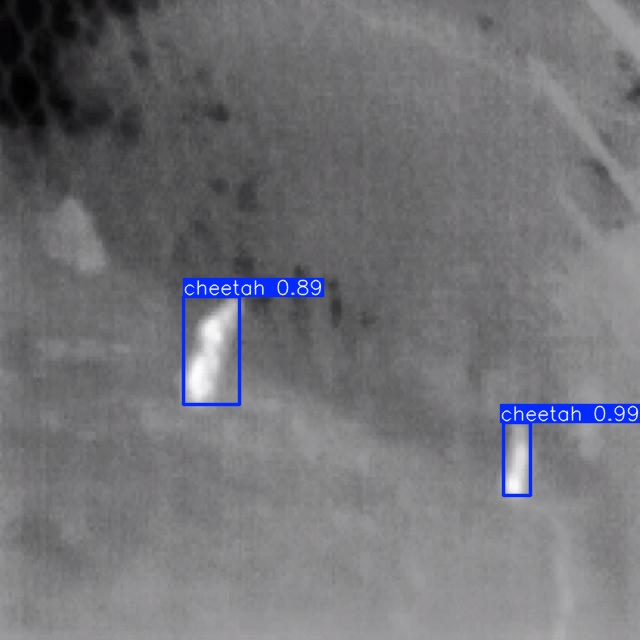

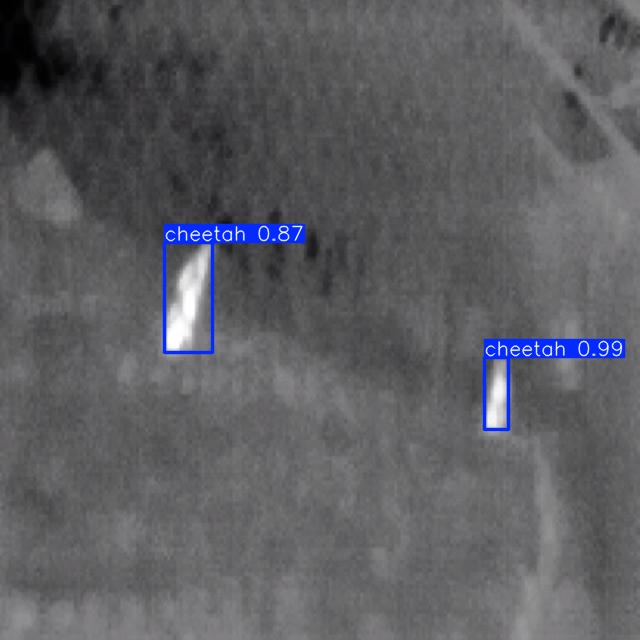

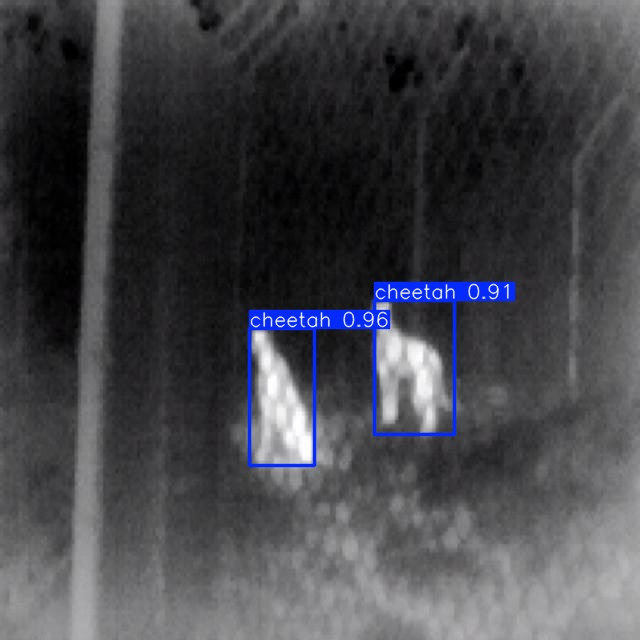

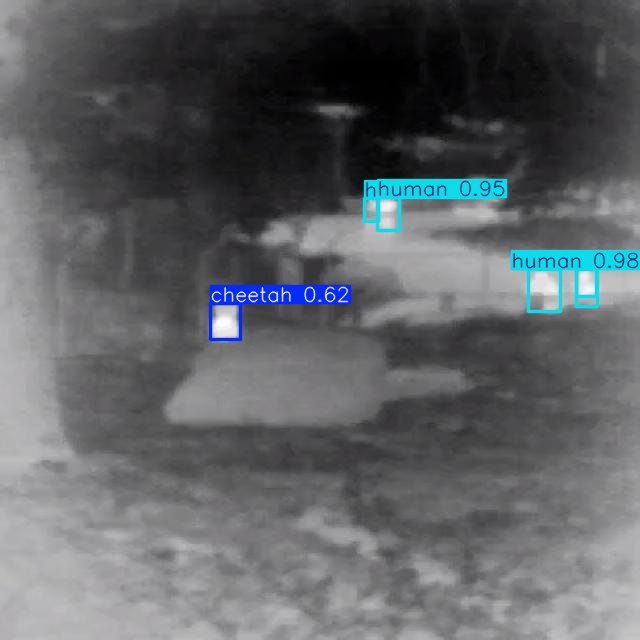

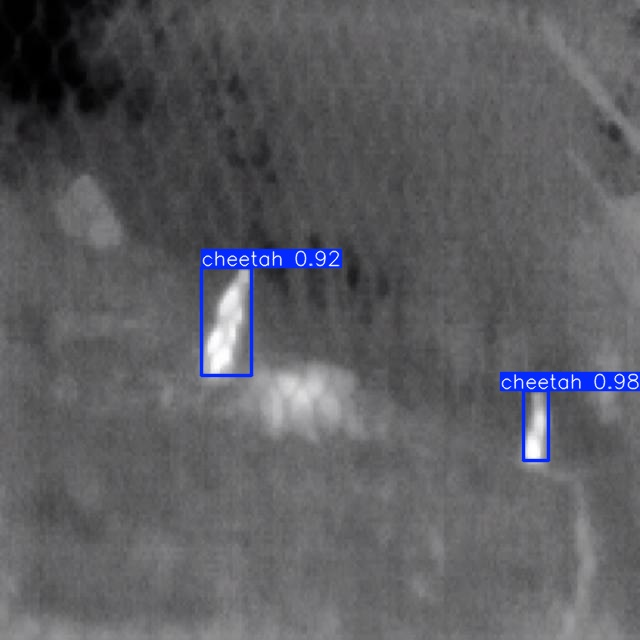

In [6]:
#display 5 results
import glob
from IPython.display import Image, display
for image_path in glob.glob("runs/detect/predict/*.jpg")[:5]:
    display(Image(filename=image_path))